In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
from acquire_g import get_zillow_data
from prepare import acquire_and_prep_data, fips_labels, zillow_split, add_scaled_columns

In [2]:
# plt rc sets defaults for matplotlib figures
plt.rc("font", size=13)
plt.rc("figure", figsize= (13,7))

# Wrangling

In [3]:
# acquiring the prep data
df = acquire_and_prep_data()
df.head()

,fullbathcnt,sqft,bathroomcnt,bedroomcnt,zip_code,taxamount,home_value,yearbuilt,tax_rate,county
1,2.0,1604,2.0,4,96415,6089.82,498347.0,1950,1.22,Los Angeles County
2,3.0,2384,3.0,3,96452,6679.55,549917.0,1937,1.21,Los Angeles County
3,2.0,1574,2.0,3,97319,3876.31,235272.0,1990,1.65,Los Angeles County
4,2.0,1619,2.0,2,97329,4206.15,340000.0,1983,1.24,Los Angeles County
5,3.0,1936,3.0,3,96124,5278.74,418146.0,1986,1.26,Los Angeles County


In [4]:
# Splitting data into train validate and split
train, validate, test = zillow_split(df)
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')
train.head().T

train -> (10432, 10)
validate -> (4472, 10)
test -> (3727, 10)


,2018,11215,19234,6619,16498
fullbathcnt,3,4,2,3,3
sqft,1221,3356,1630,1567,1522
bathroomcnt,3,4,2,3,3
bedroomcnt,3,5,3,3,4
zip_code,96124,96037,96221,96507,96497
taxamount,4561.63,16711.2,975.78,4149.74,5959.9
home_value,379753,1.4e+06,76165,335031,457967
yearbuilt,1985,2004,1952,1957,1984
tax_rate,1.2,1.19,1.28,1.24,1.3
county,Los Angeles County,Los Angeles County,Los Angeles County,Los Angeles County,Los Angeles County


In [5]:
df.fullbathcnt.value_counts()

2.0    9441
3.0    4242
1.0    4195
4.0     753
Name: fullbathcnt, dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10432 entries, 2018 to 6553
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fullbathcnt  10432 non-null  float64
 1   sqft         10432 non-null  int64  
 2   bathroomcnt  10432 non-null  float64
 3   bedroomcnt   10432 non-null  int64  
 4   zip_code     10432 non-null  int64  
 5   taxamount    10432 non-null  float64
 6   home_value   10432 non-null  float64
 7   yearbuilt    10432 non-null  int64  
 8   tax_rate     10432 non-null  float64
 9   county       10432 non-null  object 
dtypes: float64(5), int64(4), object(1)
memory usage: 896.5+ KB


In [7]:
train.describe()

,fullbathcnt,sqft,bathroomcnt,bedroomcnt,zip_code,taxamount,home_value,yearbuilt,tax_rate
count,10432.000000,10432.000000,10432.000000,10432.000000,10432.000000,10432.000000,1.043200e+04,10432.000000,10432.000000
mean,2.079084,1654.419287,2.119824,3.009298,96507.108800,4920.602837,3.983235e+05,1962.065951,1.328499
std,0.784017,703.802884,0.796901,0.903455,4216.427448,4847.131771,4.164668e+05,22.695220,0.395834
min,1.000000,320.000000,1.000000,0.000000,95982.000000,125.950000,1.151700e+04,1880.000000,0.030000
25%,2.000000,1161.000000,2.000000,2.000000,96152.000000,2449.620000,1.814202e+05,1949.000000,1.190000
50%,2.000000,1488.000000,2.000000,3.000000,96341.000000,3869.050000,3.064875e+05,1960.000000,1.240000
75%,3.000000,1981.250000,3.000000,4.000000,96533.000000,5961.017500,4.923950e+05,1979.000000,1.360000
max,4.000000,8243.000000,4.500000,5.000000,399675.000000,176576.490000,1.472112e+07,2015.000000,15.510000


In [8]:
# Most common types of homes have 1-5 bedrooms. Have a few with 0
train.bedroomcnt.value_counts()

3    4572
2    2588
4    2422
5     496
1     333
0      21
Name: bedroomcnt, dtype: int64

In [9]:
# Most common bathrooms are 1-4
train.bathroomcnt.value_counts()

2.0    4676
3.0    2269
1.0    2268
2.5     566
4.0     375
1.5     129
3.5      92
4.5      57
Name: bathroomcnt, dtype: int64

In [10]:
train.zip_code.value_counts()

96193    125
96361     92
97319     89
97328     88
96368     85
        ... 
97108      1
96039      1
97119      1
96986      1
96148      1
Name: zip_code, Length: 379, dtype: int64

In [11]:
train.sqft.value_counts()

1200    31
960     27
1120    26
1400    24
1080    23
        ..
2052     1
4143     1
3752     1
4183     1
2047     1
Name: sqft, Length: 2654, dtype: int64

# Visualizations

In [ ]:
# Visualize all variable relationships
sns.pairplot(train)

In [ ]:
g = sns.PairGrid(train)
# we can specify any two functions we want for visualization
g.map_diag(sns.distplot) # one for a single variable
g.map_offdiag(sns.regplot) # one for the interaction of two variables

Text(0.5, 1.0, 'Tax Rate per County')

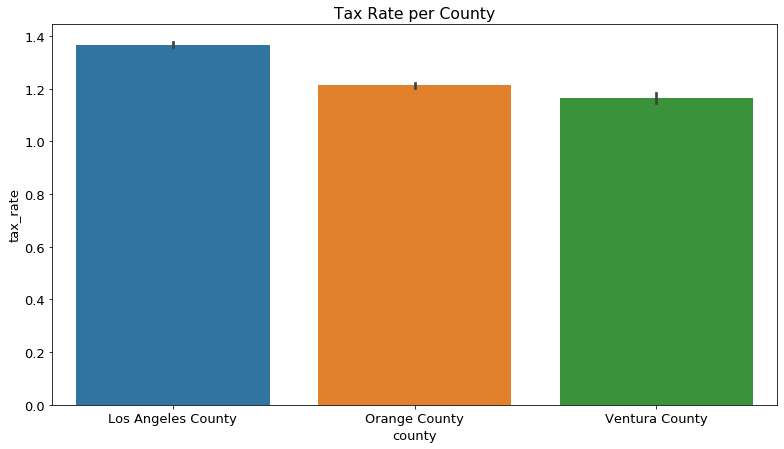

In [12]:
# visualize mean tax rate for each county
sns.barplot(data=train, y='tax_rate', x='county')
plt.title('Tax Rate per County')

Text(0.5, 1.0, 'Home Value per Full Bath')

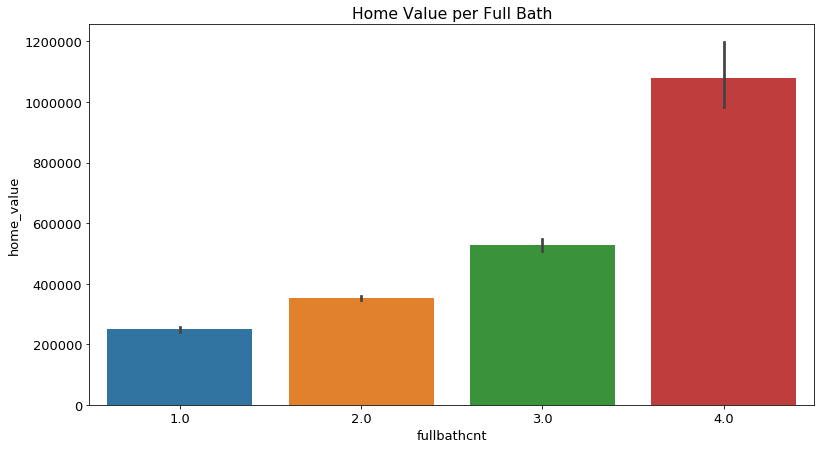

In [13]:
sns.barplot(x='fullbathcnt', y='home_value', data=train)
plt.title('Home Value per Full Bath')

Text(0.5, 1.0, 'Count of Single Unit Homes in each County')

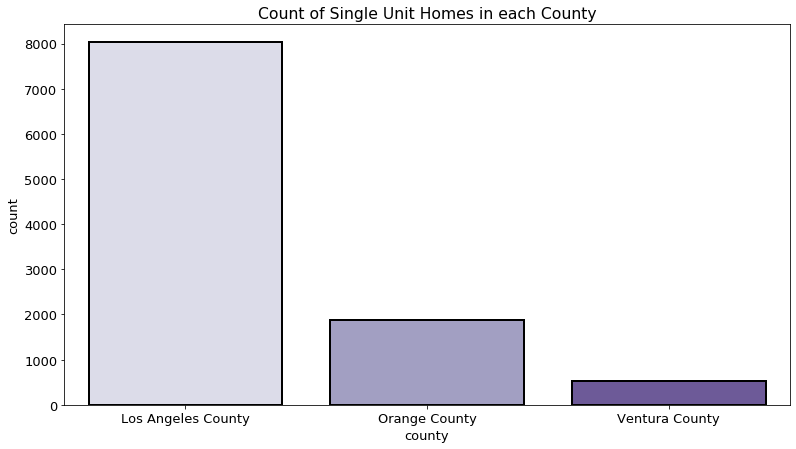

In [14]:
# visualize the number of single unit homes for each county
sns.countplot(x = 'county', data=train, palette='Purples', ec='black', linewidth=2)
plt.title('Count of Single Unit Homes in each County')

(0, 6)

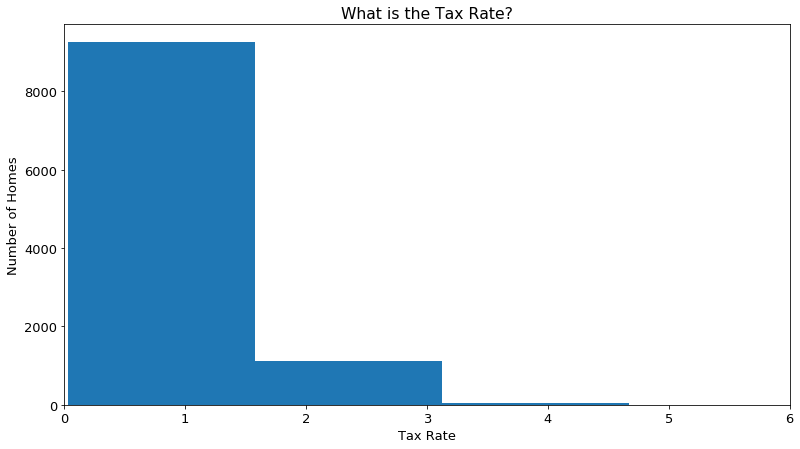

In [15]:
# Majority of homes have a tax rate from 0-1%
plt.hist(train.tax_rate)
plt.xlabel('Tax Rate')
plt.ylabel('Number of Homes')
plt.title('What is the Tax Rate?')
plt.xlim(0,6)

Text(0.5, 1, 'Correlation of Numeric Features')

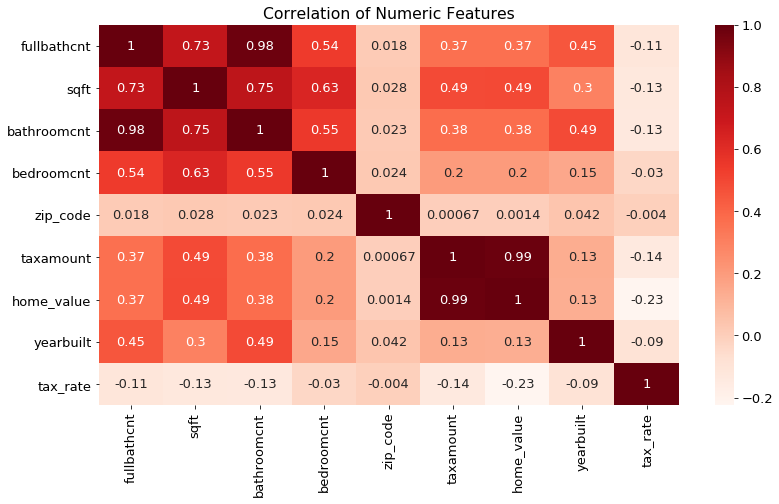

In [16]:
sns.heatmap(train.corr(), cmap='Reds', annot=True)
plt.title('Correlation of Numeric Features')

(0, 2000000)

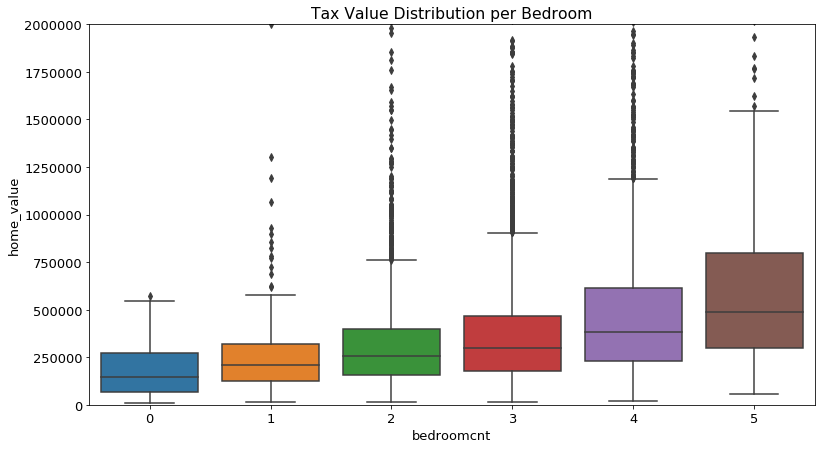

In [17]:
#set y limits to see distribution. there are several ouliers
sns.boxplot(data=train, y='home_value', x='bedroomcnt')
plt.title('Tax Value Distribution per Bedroom')
plt.ylim(0, 2_000_000)

(0, 2500000)

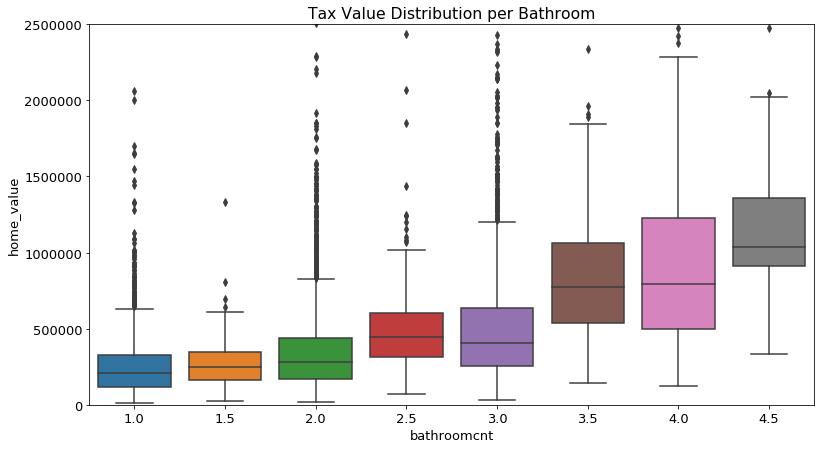

In [18]:
# visualize distribution with box plot (outliers are out of frame)
sns.boxplot(data=train, y='home_value', x='bathroomcnt')
plt.title('Tax Value Distribution per Bathroom')
plt.ylim(0, 2_500_000)

Text(0.5, 1.0, 'Tax Rate (%) Distribution per County')

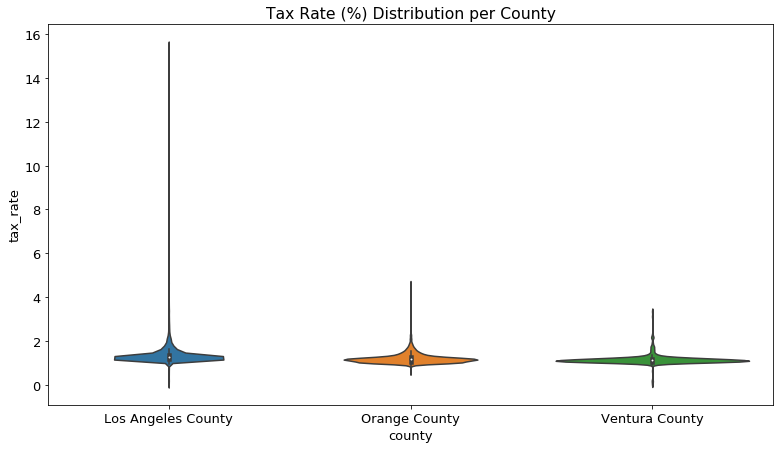

In [19]:
sns.violinplot(data=train, y='tax_rate', x='county')
plt.title('Tax Rate (%) Distribution per County')

Text(0.5, 1.0, 'Home Value per Year Built')

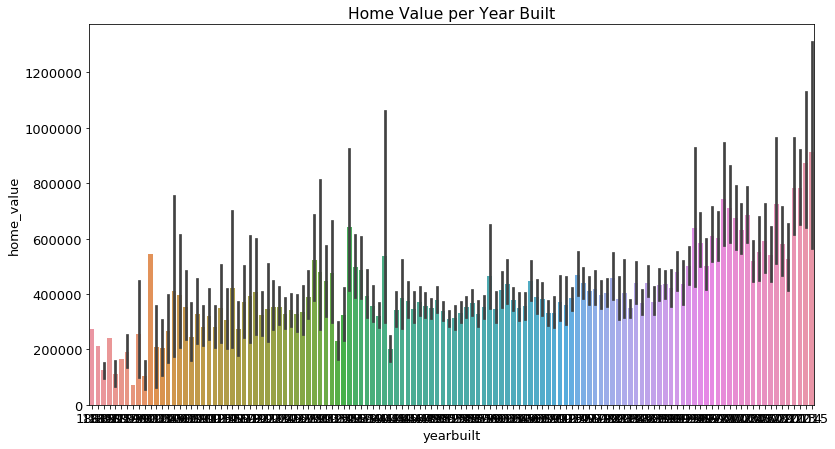

In [20]:
# Shows that newer homes seem to have a higher home value
sns.barplot(x='yearbuilt', y='home_value', data=train)
plt.title('Home Value per Year Built')

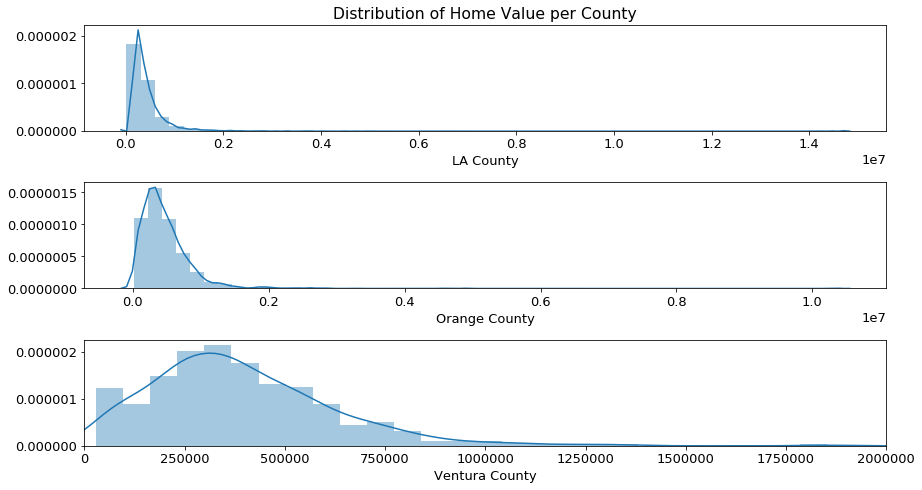

In [21]:
plt.subplot(311)
plt.title('Distribution of Home Value per County')
sns.distplot(train[train.county == 'Los Angeles County'].home_value)
plt.xlabel('LA County')

plt.subplot(312)
sns.distplot(train[train.county == 'Orange County'].home_value)
plt.xlabel('Orange County')

plt.subplot(313)
sns.distplot(train[train.county == 'Ventura County'].home_value)
plt.xlabel('Ventura County')

plt.xlim(0, 2_000_000)
plt.tight_layout()

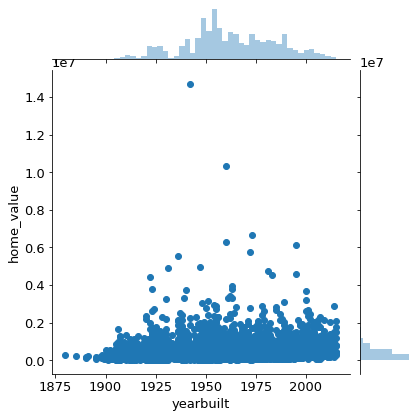

In [22]:
sns.jointplot(x='yearbuilt', y='home_value', data=train)

In [23]:
# sqft, bathrromcnt, and bedroomcnt have the bet correlation
train.corr()

,fullbathcnt,sqft,bathroomcnt,bedroomcnt,zip_code,taxamount,home_value,yearbuilt,tax_rate
fullbathcnt,1.000000,0.727408,0.984966,0.542778,0.018422,0.367288,0.365616,0.451450,-0.114857
sqft,0.727408,1.000000,0.748562,0.632608,0.028398,0.488428,0.493104,0.298304,-0.129447
bathroomcnt,0.984966,0.748562,1.000000,0.551120,0.023367,0.376218,0.377550,0.490728,-0.129858
bedroomcnt,0.542778,0.632608,0.551120,1.000000,0.024293,0.204631,0.201585,0.153151,-0.030012
zip_code,0.018422,0.028398,0.023367,0.024293,1.000000,0.000670,0.001429,0.041584,-0.004018
taxamount,0.367288,0.488428,0.376218,0.204631,0.000670,1.000000,0.987745,0.133802,-0.139032
home_value,0.365616,0.493104,0.377550,0.201585,0.001429,0.987745,1.000000,0.131865,-0.225208
yearbuilt,0.451450,0.298304,0.490728,0.153151,0.041584,0.133802,0.131865,1.000000,-0.089878
tax_rate,-0.114857,-0.129447,-0.129858,-0.030012,-0.004018,-0.139032,-0.225208,-0.089878,1.000000


**takeaways**    
- there are several outliers in the data in terms of `home_value`
- `tax_rate` seems to be higher in LA County
- LA county has a lot more homes than anywhere else
- newer homes seem to have a higher home value
- majority of homes have a tax rate from 0-1%

___
## Hypothesis Tests

Does LA County have a higher average tax rate than the overall population?

### One Sample Single-Tailed T-Test

(0, 3)

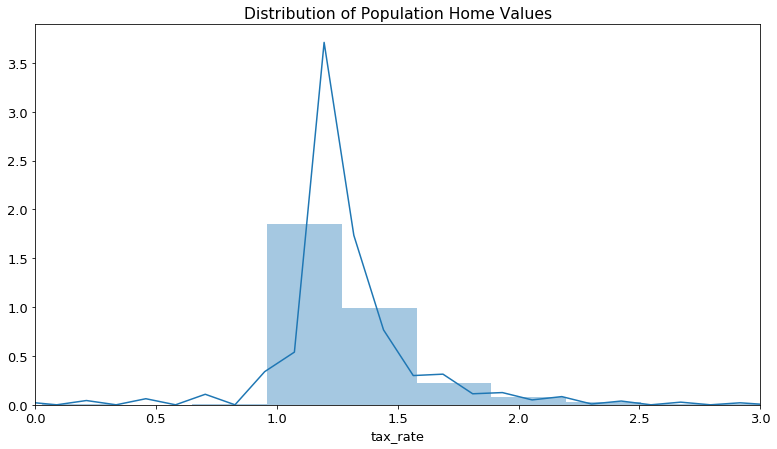

In [43]:
#plt.hist(train.tax_rate)
sns.distplot(train.tax_rate)
plt.title('Distribution of Population Home Values')
plt.xlim(0,3)

(0, 3)

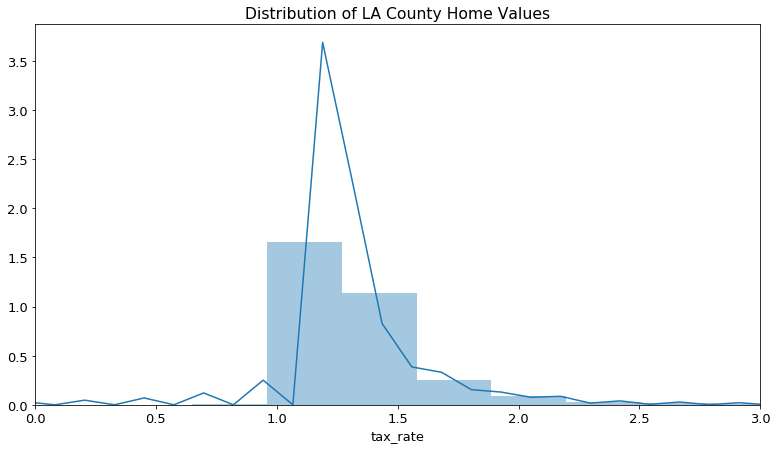

In [44]:
sns.distplot(train[train.county == 'Los Angeles County'].tax_rate)
plt.title('Distribution of LA County Home Values')
plt.xlim(0, 3)

**Hypotheses**

$H_0$: mean tax rate Los Angeles County <= the overall population of assessed counties

$H_a$: mean tax rate Los Angeles County > the overall population of assessed counties

In [45]:
null_ost = 'the mean tax rate Los Angeles County <= the overall population of assessed counties'

# set a significance level
alpha = .05

# verify assumptions
train.county.value_counts()

Los Angeles County    8026
Orange County         1877
Ventura County         529
Name: county, dtype: int64

**Compute T-Statistic and P-Value**

In [46]:
overall_mean = train.tax_rate.mean()
sample_mean = train.tax_rate[train.county == 'Los Angeles County']

t, p = stats.ttest_1samp(sample_mean, overall_mean)
print('T-statistic: ', t)
print('P-value: ', p/2)

T-statistic:  7.984632930779852
P-value:  8.024468316734068e-16


**Decision**

In [47]:
if p/2 > alpha:
    print("We fail to reject H_0 that", null_ost)
elif t < 0:
    print("We fail to reject H_0 that", null_ost)
else:
    print("We reject H_0 that", null_ost)

We reject H_0 that the mean tax rate Los Angeles County <= the overall population of assessed counties


---
### Correlation Test

Is there a linear relationship between bathroom and bedroom count?

Text(0.5, 1.0, 'Square Footage vs. Tax Amount')

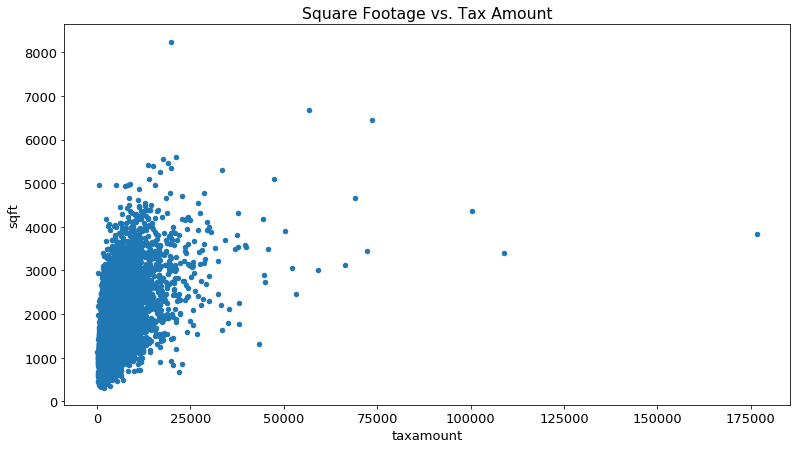

In [48]:
train.plot.scatter(y='sqft', x='taxamount')
plt.title('Square Footage vs. Tax Amount')

**Hypotheses**

$H_0$: There is no linear relationship between square footage and tax amount

$H_a$: There is a linear relationship between square footage and tax amount

In [49]:
null_ct = 'there is no linear relationship between square footage and tax amount'

# set a significance level
alpha = .05

x = train.taxamount
y = train.sqft

**Compute T-Statistic and P-Value**

In [50]:
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

r = 0.4884284284444482
p = 0.0


**Decision**

In [51]:
if p > alpha:
    print("We fail to reject H_0 that", null_ct)
else:
    print("We reject H_0 that", null_ct)

We reject H_0 that there is no linear relationship between square footage and tax amount


**Takeaways**: 
- the mean `tax_rate` is greater in LA County than the population mean

- there is a decent linear relationship between `sqft` and `taxamount`